## Лабораторная №1. Наложение фильтров на изображение

Выполнили: 
- Логинов Сергей
- Наливайко Сергей
- Гафиров Абдималик

### Задание 1. 

Наложить на изображение попиксельный фильтр.

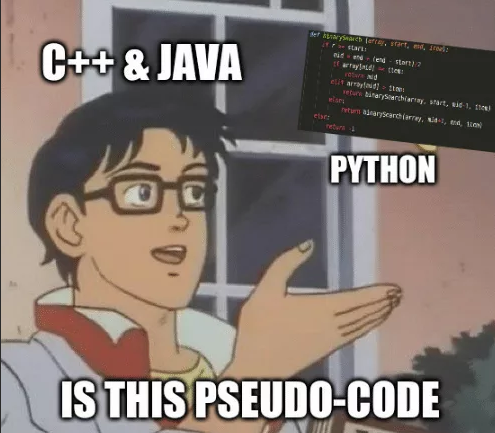

In [1]:
from PIL import Image

img = Image.open('mem.png')
display(img)

Негатив

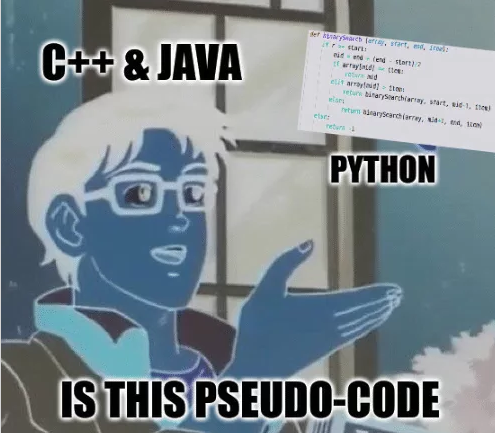

In [2]:
def make_negative(img):
    """
    Функция применяет фильтр негатива для каждого пикселя
    img: исходное изображение
    """
    width, height = img.size
    negative_img = Image.new('RGB', (width, height), (0, 0, 0))
    for i in range(0, width):
        for j in range(0, height):
            r,g,b = img.getpixel((i, j))       
            negative_img.putpixel((i,j), (255 - r, 255 - g, 255 - b))
    return negative_img
negative_image = make_negative(img)
negative_image.save("negative_image.png")
display(negative_image)

Сдвиг цвета

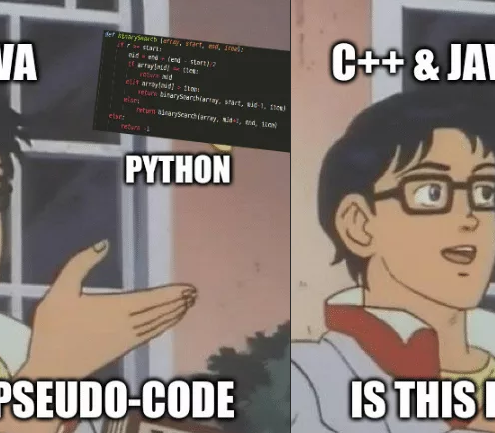

In [3]:
def make_shift(img, shift = 700):
    """
    Функция применяет фильтр сдвига для каждого пикселя
    img: исходное изображение
    shift: сдвиг на кол-во пикселей
    """
    width, height = img.size
    shifted_img = Image.new('RGB', (width, height), (0, 0, 0))
    for i in range(0, width):
        for j in range(0, height):
            r,g,b = img.getpixel((i, j))
            tmp = (i + shift) % width            
            shifted_img.putpixel((i,j), (img.getpixel((tmp, j))))
    return shifted_img
shifted_image = make_shift(img)
shifted_image.save("shifted_image.png")
display(shifted_image)

---

### Задание 2

наложить на изображение фильтр, работающий по области

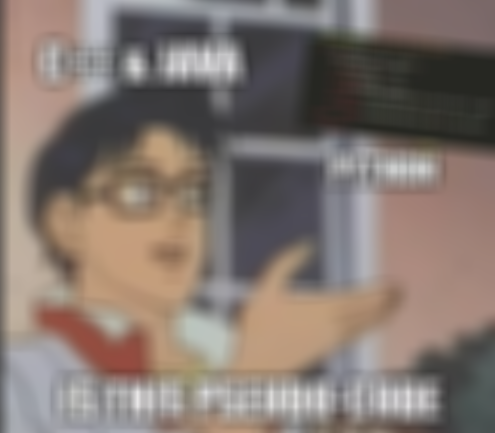

In [4]:
import numpy as np

def convolve(img, kernel):
    """
    Функция применяет свертку к изображению
    """
    h, w = img.shape
    k = kernel.shape[0]
    result = np.zeros_like(img)

    pad_size = k // 2
    padded_img = np.pad(img, pad_size, mode='edge')

    for i in range(h):
        for j in range(w):
            result[i,j] = np.sum(padded_img[i:i+k, j:j+k] * kernel)

    return result

def make_blur(img, radius=5, sigma=1):
    """
    Функция применяет фильтр размытия Гаусса к изображению
    img: исходное изображение
    radius: радиус размытия
    sigma: стандартное отклонение функции Гаусса
    """

    image = np.array(img)

    k = 2 * radius + 1
    kernel = np.zeros((k, k))
    for i in range(k):
        for j in range(k):
            x = i - radius
            y = j - radius
            kernel[i,j] = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / np.sum(kernel)

    result = np.zeros_like(image)
    for c in range(3):
        result[:,:,c] = convolve(image[:,:,c], kernel)

    result = Image.fromarray(np.uint8(result))

    return result

blured_image = make_blur(img, 10, 15)
blured_image.save("blured_image.png")
display(blured_image)

Зернистость

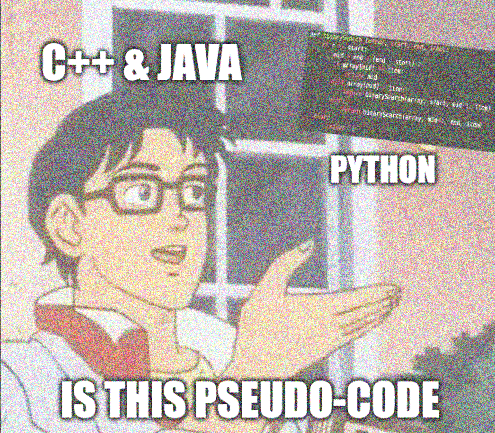

In [5]:
def make_grain(img, intensity=0.1):
    """
    Функция добавляет эффект зернистости к изображению

    Parameters:
    img: исходное изображение
    intensity: интенсивность зернистости
    """
    image = np.array(img)
    noise = np.random.rand(*image.shape) * intensity
    result = np.clip(image + noise * 255, 0, 255).astype(np.uint8)
    result = Image.fromarray(result)

    return result
grain_image = make_grain(img, 0.5)
grain_image.save("grain_image.png")
display(grain_image)